In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rand
import sklearn.linear_model as lm

# Introduction

Neural networks are a type of machine learning algorithms developped to solved classification or regression problem. They mimic the way our humain brain works.

Let's go in the shoes of a brillant doctor (if you are a TV show savvy like me, you can choose to be Dr House, Dr Aaron Glassman or Dr Cristina Yang) and explain how the brain works. The brain is a collection of neurons linked with one another. They are composed with multiple ***dentrites*** and an ***axon***. those elements allow the neurons to be connected to each other. The physical location where the neurons are connected is called ***synapses***. The intensity of this connection is variable.

To put it in a nutshell, a neuron transmits information to an other neuron through the connection axon/dentrites and this connection is as strong as the synapses. The inputs are taken through the dentrites which ***activates*** the neuron and when the neuron is activated, it transmits information to another neuron via its axon.

![](maxresdefault.jpg)

Those notions are important for themselves. But if I put you in the shoes of a physicist, it is not just for the pleasure of the experience. I think it will give a good background for the remainder of this exposé. If you are interested to know how the machine learning and the neuroscience are intertwined, I recommand you to read [this article](http://www.columbia.edu/cu/appliedneuroshp/Papers/out.pdf)

# A traditional machine learning model: Logistic Regression Classifier

## Classical representation of the Logistic Regression

The Logistic Regression Classifier (LRC) is used to make predictions on binary variable. In this section, I want to represent the LRC as a neuron or, more precisely, as a perceptron. But first, what is the standard representation of the LCR? (It will get a bit theoretical but bear with me, it is for the higher good)

Let's suppose, we have a set $\{(\hat{X}_i,\hat{y}_i), i \in [[0,n]]\}$ such as $\forall i, \hat{y}_i \in \{0,1\}$ and $\hat{X}_i \in R^m$.
We would expect that a "machine learns" on this dataset means that we find a function $f_\theta$ such as:
$$\forall i \in [[0,n]], f_\theta (\hat{X}_i) = \hat{y}_i$$
However, there are many things wrong (or too optimistic, to put it mildly) with this expectation. let's take two points:

1. **Lack of Generalisation**: The goal of a machine learning model is not to avoid mistakes but to estimate the general rule which explain the output ($y_i$) from the input ($X_i$). This general rule is only partially defined by the observed dataset because there is a noise in the measure, which means, instead of observing the true $(X_i,y_i)$ we have a noisy $(\hat{X}_i,\hat{y}_i)$
2. **Smoothness**: The function $f_\theta$ is defined as a function from $R^m$ to $\{0,1\}$. So this function is not continuous. However, to ease the computation endeavor to calibrate (or identify) the parameter $\theta$ some level of smoothness is needed.

So, in the Logistic Regression framework, we will say that "the machine has learned" when it finds the parameter $\theta$ which minimizes:
$$ J(\theta) = - \frac{1}{n}\sum_{i=1}^{n} \bigg(y_i.log(f_\theta{}(X_i))+(1-y_i)log(1-f_\theta{}(X_i))\bigg) \tag{1}$$

$J$ is called the cost function (This is the **cross-entropy error**). Hence, instead of trying to have an equality between the estimate and the observed value, we try to reduce the cost (or the error) to a minimum. This will allow our machine to have a better generalisation power.

Moreover, $f_\theta$ does not try to replicate the output, per se. Instead, it will try to estimate the probability of an observation having $y=1$. $f_\theta$ is the sigmoid function:
$$f_\theta(X)=\frac{1}{1+e^{-X\theta^T}} \tag{2}$$

So, the cost function and the sigmoid function resolve our two issues (lack of generalisation and smoothness).

All this is a bit theoretical, but with this understanding, we are already equiped to do some interpretations. If we assume $P(Y=1|X)=\frac{1}{1+e^{-X\theta^T}}$ (as the LRC does), the risk ratio 1/0 is $Ratio_{1/0}(X):=\frac{P(Y=1|X)}{P(Y=0|X)}=\frac{P(Y=1|X)}{1-P(Y=1|X)}=e^{X\theta^T}$

therefore, $$\frac{1}{Ratio_{1/0}}\times\frac{\partial Ratio_{1/0}}{\partial X}=\theta^T$$

TADA! This equation says that the relative increase of the risk with a slight increase of $X$ is $\theta^T$

In [168]:
def sigmoid(X,theta):
    """ computation of a sigmoid: X is the matrix of characteristics (row: observations. columns:characteristics)
    theta is the parameter (1 row)"""
    res = X.dot(theta.T)
    res = 1/(1+np.exp(-res))
    return res

In [169]:
X_ex = np.matrix(np.linspace(-100,100)).T
theta = np.matrix([0.25])
sig = sigmoid(X_ex,theta)

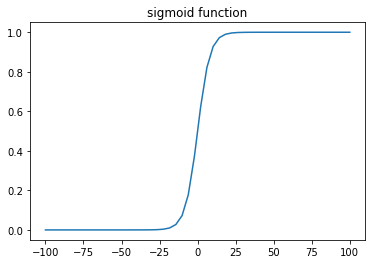

In [170]:
plt.figure()
plt.plot(X_ex,sig)
plt.title("sigmoid function")
plt.show()

## Neural network representation

In the last section, we saw the classic representation of the LCR and how to interpret the parameter. In this section, I want to make a link between the neuroscience experience we did (remember? Dr Aaron Glassman taking a look in the function of the neuron?) and the logistic regression model.

Just as a remainder, for the LRC, We have $P_\theta(Y=1|X)=\frac{1}{1+e^{-X\theta^T}}$, where $Y$ is the target and $X$ are the features.

Now let's suppose that an imaginary (or artificial ;) ) neuron receives a number of inputs through the synapses it has with other. For each flow of input $i$ and each synapses $j$, the information $X_{i,j}$ is attenuated or strenghtened by the synapses $j$. Hence, the neuron receives the information $X_{i,j}\times\theta_j$. 
The activation neuron unleashes a flow of information. In order to join the LCR and the function of the neuron, the information transmitted is $f_\theta(X_i)$: $f_\theta$ is called the **activation** function.

To sum up:
1. One flow of input $i$ is an observation of our dataset ($X_{i}$)
2. Each dendrite $j$ is capable to capture one characteristic ($X_{.,j}$)
3. The dendrite has a synapse which strengthens by $\theta_j$ the information $X_{i,j}$
4. The activation function is the sigmoid function in the case of LRC

Great! The circle is almost complete! We now have to understand how the machine learns. Really! How do we estimate the vector $\theta$? (Hint: gradient descent :) )

## Learning process

Now, we know that the Logistic Regression is a neuron which receives a flow of information through its dendrites, modifies this information with the synapses, activates itself by transmitting information with the activation function. So a neuron is defined by the strength of its synapses ($(\theta_j)\in R^m$) and its activation function (for the Logistic Regression, it is, by definition, the sigmoid).

Therefore, to resolve our problem, we need to determine the vector $(\theta_j)$. This vector has the important role to capture the general rule linking the input with the output. For the purpose of a good generalization, $\theta$ is defined as: 

$$\arg\min_{\theta}J(\theta) =\arg\min_{\theta} \Bigg (- \frac{1}{n}\sum_{i=1}^{n} \bigg(y_i.log(f_\theta{}(X_i))+(1-y_i)log(1-f_\theta{}(X_i))\bigg)\Bigg ) \tag{3}$$

The learning process is "just" an optimization problem. There is an extensive litterature on the subject. Maybe I will do an other Notebook on this subject. But for now, I recommend you this [post](https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3): he presents the algorithm Batch Gradient descent that will use. For further reading, you can also read this [post](https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9)

### Batch Gradient descent

The idea of the gradient descent is to find the minimum of a function by using the "direction" of the derivative (or gradient). Suppose you are at the top of a montain and in order to get to the bottom, each step you take is the one in the opposite direction of the montain's top. I won't go further in this algorithm. You can read the posts, I mentionned above... :)

We will use a mock dataset to show how perform the caliration. This dataset contains the 2 notes of 100 students and a categorical variable showing whether the students were admitted at the end of the year.

In [171]:
dataset_1 = pd.read_csv("Datasets/ex2data1.txt",header=None,names=["Exam 1 score","Exam 2 score","Admission"])
feature_trick =np.repeat(1,dataset_1.shape[0])
dataset_1.insert(0,"bias",feature_trick)

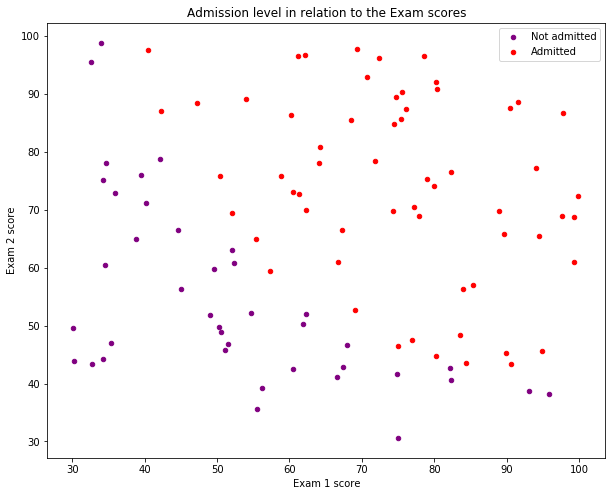

In [172]:
fig,ax = plt.subplots()
ax.set_title("Admission level in relation to the Exam scores")
col={0:"purple",1:"red"}
lab={0:"Not admitted",1:"Admitted"}


grouped = dataset_1.groupby("Admission")
for key, data in grouped:
    data.plot.scatter(ax=ax,x="Exam 1 score",y="Exam 2 score",label=lab[key],color=col[key],figsize=(10,8))

In [173]:
dataset_1.head()

,bias,Exam 1 score,Exam 2 score,Admission
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


* **The functions**: We define the functions, we will use to help our machine learns: The cost function, its gradient and the algorithm of the gradient descent.

In [174]:
def cost_function(X,y,theta):
    """X is the matrix of characteristics (row: observations. columns:characteristics)
    theta is the parameter (1 row)"""
    n = X.shape[0]
    
    activation_info = sigmoid(X,theta)
    #print(activation_info)
    term_A = np.multiply(np.log(activation_info),y)
    term_B = np.multiply(1-y,np.log(1-activation_info))
    
    res = -(1/n)*(sum(term_A)+sum(term_B))
    res=res[0,0]
    return(res)

**The gradient of the cost**

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta}& = & -\frac{1}{n}\sum_{i=1}^{n}\bigg(y_i X_i \frac{e^{-X_i \theta^T}}{1+e^{-X_i \theta^T}}-(1-y_i)X_i\frac{1}{1+e^{-X_i \theta^T}}\bigg)\\
& = & -\frac{1}{n} \sum_{i=1}^{n}\bigg(y_i (1-f_\theta (X_i))-(1-y_i) f_\theta (X_i)\bigg)X_i\\
& = & -\frac{1}{n} \sum_{i=1}^{n} (y_i - f_\theta (X_i))X_i
\end{align}$$

In [175]:
def derivate_cost(X,y,theta):
    n=X.shape[0]
    activation_info = sigmoid(X,theta)
    res = -(1/n)*((y-activation_info).T.dot(X))
    return(res)

In [176]:
def gradient_descent(X,y,theta_init,learning_rate,iter_limit=2):
    
    theta_temp=theta_init
    columns_theta = ['theta_'+str(x) for x in range(0,theta_init.shape[1])]
    costs=[cost_function(X,y,theta_init)]
    thetas=pd.DataFrame(theta_init,columns=columns_theta)
    i=0
    while i<iter_limit:
        theta_temp=theta_temp - (learning_rate)*derivate_cost(X,y,theta_temp)
        costs.append(cost_function(X,y,theta_temp))

        thetas=pd.concat([thetas,pd.DataFrame(theta_temp,columns=columns_theta)],ignore_index=True)
        i=i+1
    
    return({"theta_final":theta_temp,"costs":costs,"thetas":thetas})


In [177]:
data=np.matrix(dataset_1.loc[:,["Exam 1 score","Exam 2 score"]])
target=np.matrix(dataset_1.Admission).T
theta = np.matrix([0.25,0.11])

cost_function(X = data,y=target,theta=theta)

7.606526309794523

In [178]:
derivate_cost(X = data,y=target,theta=theta)

matrix([[20.81291666, 21.8481514 ]])

In [179]:
data=np.matrix(dataset_1.loc[:,["bias","Exam 1 score","Exam 2 score"]])
target=np.matrix(dataset_1.Admission).T
theta = np.matrix([90,-1,-1])

test =gradient_descent(X=data,y=target,theta_init=theta,learning_rate=0.000006,iter_limit=1000)

In [187]:
test["thetas"].tail()

,theta_0,theta_1,theta_2
996,90.002680,-0.772729,-0.779069
997,90.002682,-0.772551,-0.778902
998,90.002683,-0.772374,-0.778735
999,90.002685,-0.772196,-0.778569
1000,90.002687,-0.772019,-0.778402


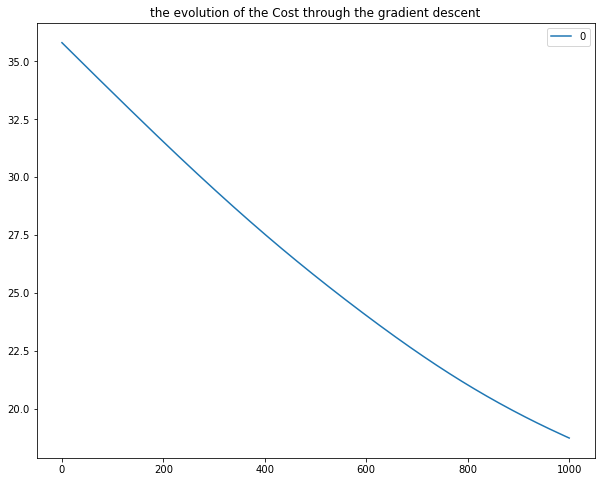

In [180]:
fi,ax=plt.subplots()
ax.set_title("the evolution of the Cost through the gradient descent")
pd.DataFrame(test["costs"]).plot.line(ax=ax,figsize=(10,8))
plt.show()

In [181]:
X= range(30,90)
b= - test["thetas"].iloc[-1,:].theta_0/test["thetas"].iloc[-1,:].theta_2
a= -test["thetas"].iloc[-1,:].theta_1/test["thetas"].iloc[-1,:].theta_2
y = [b + x*a for x in X]

In [182]:
LR = lm.LogisticRegression()
LR.fit(X=dataset_1.loc[:,["Exam 1 score","Exam 2 score"]],y=dataset_1.loc[:,"Admission"])
a1=-LR.coef_[0,0]/LR.coef_[0,1]
b1=-LR.intercept_/LR.coef_[0,1]
y1 = [b1 + x*a1 for x in X]

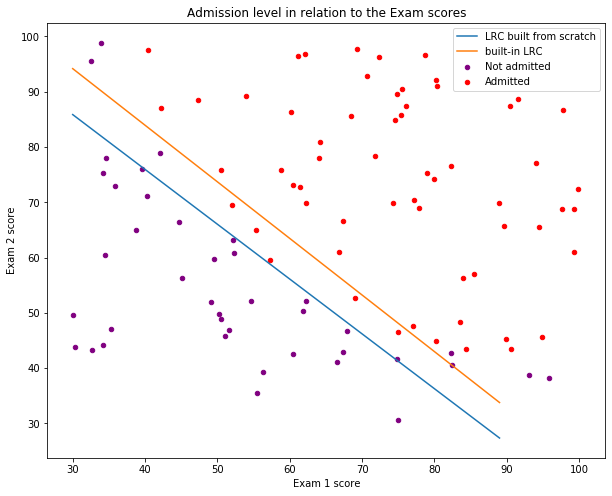

In [183]:
fig,ax=plt.subplots()
ax.set_title("Admission level in relation to the Exam scores")
lab={0:"Not admitted",1:"Admitted"}
col={0:"purple",1:"red"}
grouped =dataset_1.groupby("Admission")
for key, data in grouped:
    data.plot.scatter(ax=ax,x="Exam 1 score",y="Exam 2 score",label=lab[key],color=col[key],figsize=(10,8))

ax.plot(X,y,label="LRC built from scratch")
ax.plot(X,y1,label="built-in LRC")
ax.legend()
plt.show()

In [184]:
data=np.matrix(dataset_1.loc[:,["bias","Exam 1 score","Exam 2 score"]])
target=np.matrix(dataset_1.Admission).T
theta = np.matrix(test["thetas"].iloc[899,:])

print("the cost of the LRC built from scratch is {:.3f}".format(cost_function(X = data,y=target,theta=theta)))

the cost of the LRC built from scratch is 19.820


In [185]:
theta_builtin = [LR.intercept_[0]]
theta_builtin.extend(LR.coef_[0,:])
data=np.matrix(dataset_1.loc[:,["bias","Exam 1 score","Exam 2 score"]])
target=np.matrix(dataset_1.Admission).T
theta = np.matrix(theta_builtin)

print("the cost of the built in LRC is {:.3f}".format(cost_function(X = data,y=target,theta=theta)))

the cost of the built in LRC is 0.203


Our optimization by gradient descent could be improved (an idea for an other article :) )

# Multi-layer neural network

Great! You stay with me so far! We arrive at the gist of my post. I hope that with what you have seen, you are convinced that artificial neuron can be used in multiple application; we just have to define our synapses and the activation function.

A multi-layer neural network is a stack of multiple layers of neurone, each with their own synapses and activation function. In this article, we will use only the sigmoid function as activation function.

Below, we can see two representation of the Neural Network (NN). 
1. There is an *input layer*. This layer is not a computational layer, it only captures the characteristics and passes it to the other layers
2. Then, there are the *hidden layers* (in the example, the hidden layers have 3 units or neurons)
3. Finally, there is the *output layer*

![Representation of a neural network](representation_nn.png)

## Feed-forward network

The architecture of a neural network is how the neurons are connected with each other. We will study only one type of achitecture: the feed-forward network. it is composed of successive layers feeding into one another in the forward direction from input to output.

Let's suppose that (Sorry, but we will need some notations. Try to understand those, it will help for the rest :) ):
* we have a network with $d$ units in the input layers ($d=5$ in our example)
* we have $p_k$ units in the hidden layer $k$ ($p_k= 3$ in our example)
* we have $p$ units in the output layer

From the input layer to first hidden layer: $h_1 = \Phi(\Theta_1^T X)$ with $\Theta_1$ being a $d \times p_1$ matrix and containing the synapses of the $p_1$ units. $z_1 := \Theta_1^T X$ is the *pre-activation value* and $h_1:=\Phi(\Theta_1^T X)$ is the *post-activation value*. $\Phi$ is the activation function

From the first hidden layer to the second: $h_2 = \Phi(\Theta_2^T h_1)$

And so on...

Hence, the idea of the Neural Network is to successively create new features $h_k$ which will ease the discriminatory role of the activation function.

## Learning process

The learning process of the feed-forward NN is less straightfoward than the LRC's learning process. This is due to the fact that the output value is not directly dependant of the inputs values. Hence the gradient is not easily computable.

So we implement:

* A **Forward phase**: to compute all the post-activation values $h_k$ throughout the network, including the output value and the Cost function $J(\Theta_1,\dots,\Theta_K)$ (with $K$ being the number of layers). Here the Cost function similar to the one we have encounter for the Logistic Regression classifier. However, as the number of classes maybe higher than 2 ($p>2$), each unit in the output layer will represent a one-vs-all classifier. So the cost is:
$$J(\Theta_1,\dots,\Theta_K)=-\frac{1}{n}\sum_{i=1}^{n}\sum_{j=1}^{p}\bigg(y_{i,j}log(h_{i,j})+(1-y_{i,j})log(1-h_{i,j})\bigg)$$

$h$ being the post-activation values of the output layer

* then a **Backward phase**: The role of this phase is to compute the gradient of the cost with respect to the inputs 
* Finally an **Optimization phase**: Like in the case we LRC, the goal is to find the parameters which minimize the cost function

### Practice: 

For this example, we will use a dataset on hand-written numbers from 0 to 9. There are 5000 such number, they are represented by 20\*20 (400) pixels. For modelling, we will use a Feed forward NN with 3 layers: one input layer with 400 units (+ 1 bias unit), one hidden layer with 25 units (+ 1 bias unit) and one output layer with 10 units.

In [286]:
y = pd.read_csv("Datasets/target.csv",header=None,names=["target"])
X = pd.read_csv("Datasets/character.csv",header=None)
feature_trick =np.repeat(1,X.shape[0])
X.insert(0,"bias",feature_trick)

In [289]:
Theta1 = pd.read_csv("Datasets/Theta1.csv",header=None)
Theta2 = pd.read_csv("Datasets/Theta2.csv",header=None)
Theta1 = np.matrix(Theta1)
Theta2 = np.matrix(Theta2)

In [288]:
X=np.matrix(X)
y=np.matrix(y)

In [287]:
X.shape

(5000, 401)

In [408]:
print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


* Forward phase

In [402]:
def activation_function(X):
    res = 1.0/(1.0+np.exp(-X))
    return res

In [456]:
def Forward_phase_nn(X,y,Theta_1,Theta_2):
    # From input layer to first hidden layer
    n= X.shape[0]
    
    pre_activation_1 = X.dot(Theta_1.T)
    post_activation_1 = activation_function(pre_activation_1)
    
    bias = np.matrix(np.repeat(1,post_activation_1.shape[0]))
    post_activation_1 = np.append(bias.T,post_activation_1,axis=1)
    
    pre_activation_2 = post_activation_1.dot(Theta_2.T)
    output = activation_function(pre_activation_2)
    
    target = np.zeros((y.shape[0],10))
    for index, x in enumerate(y.tolist()):
        target[index,x[0]-1]=1
        
    term_A = np.multiply(target,np.log(output))
    term_B = np.multiply((1-target),np.log(1-output))
    summation = term_A + term_B
    
    J = (-1/n)*(summation.sum())
    
    return {"prediction":output,"cost":J,"target":target,"z_1":pre_activation_1}

In [457]:
test = Forward_phase_nn(X,y,Theta1,Theta2)

In [458]:
test["cost"]

0.2876291651613189

* Backward phase

As I said, the Backward phase tries to compute: $\frac{\partial J}{\partial \Theta}$. This algorithm is explained in this [post](https://towardsdatascience.com/backward-propagation-for-feed-forward-networks-afdf9d038d21)

In [428]:
def sigmoid_derivative(z):
    res=np.multiply(activation_function(z),(1-activation_function(z)))
    return res

In [429]:
def backward_phase_nn(Theta_1,Theta_2,X,Forward_phase_result):
    n= X.shape[0]
    sigma3 = Forward_phase_result["prediction"]-Forward_phase_result["target"]
    
    z_1 = Forward_phase_result["z_1"]
    bias = np.matrix(np.repeat(1,z_1.shape[0]))
    z_1_bias = np.append(bias.T,z_1,axis=1)
    
    post_z_1 = np.append(bias.T,activation_function(z_1),axis=1)
    
    sigma2 = np.multiply(sigma3.dot(Theta_2), sigmoid_derivative(z_1_bias))[:,1:]
    
    Delta_1 = (1/n)*sigma2.T.dot(X)
    Delta_2 = (1/n)*sigma3.T.dot(post_z_1)
    
    return({"Theta1_grad":Delta_1,"Theta2_grad":Delta_2})

In [430]:
back_test = backward_phase_nn(Theta1,Theta2,X,test)

In [462]:
def gradient_descent_nn(X,y,Theta_1,Theta_2,learning_rate,iter_limit=100):
    
    theta1_temp=Theta_1
    theta2_temp=Theta_2
    
    costs=[]
    i=0
    while i<iter_limit:
        feedforward =Forward_phase_nn(X,y,theta1_temp,theta2_temp)
        backward = backward_phase_nn(theta1_temp,theta2_temp,X,feedforward)
        gradient1 = backward["Theta1_grad"]
        gradient2 = backward["Theta2_grad"]
        
        costs.append(feedforward["cost"])
        #print(theta2_temp[1,:])
        theta1_temp = theta1_temp - (learning_rate)*gradient1
        theta2_temp = theta2_temp - (learning_rate)*gradient2
        i=i+1
    
    return({"theta1_final":theta1_temp,"theta2_final":theta2_temp,"costs":costs})

In [473]:
gradient_descent_ = gradient_descent_nn(X,y,Theta1,Theta2,0.5,iter_limit=5000)

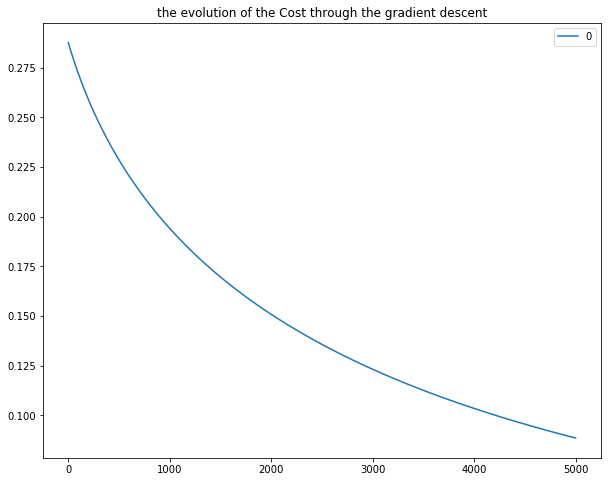

In [474]:
fi,ax=plt.subplots()
ax.set_title("the evolution of the Cost through the gradient descent")
pd.DataFrame(gradient_descent_["costs"]).plot.line(ax=ax,figsize=(10,8))
plt.show()

In [435]:
Theta2.shape

(10, 26)

# Reading 

https://mlfromscratch.com/neural-networks-explained/#/

https://medium.com/machine-learning-for-li/explain-feedforward-and-backpropagation-b8cdd25dcc2f

https://towardsdatascience.com/backward-propagation-for-feed-forward-networks-afdf9d038d21